Тема урока: декораторы
Определение декоратора
Специальный синтаксис применения декораторов
Изменение поведения функции
Применение нескольких декораторов
Декорирование функций, принимающих аргументы
Возврат значений из декорируемой функции
Аннотация. Урок посвящен декораторам.

Определение декоратора

Иногда нам нужно модифицировать существующую функцию, не меняя при этом ее исходный код.

Декоратор — это функция, которая принимает другую функцию, расширяет ее поведение, не изменяя ее явно, и возвращает новую функцию.

Прежде чем понять, как работают декораторы и начать создавать их, вспомним некоторые важные особенности функций:

функции являются объектами первого класса, то есть функции можно передавать и использовать в качестве аргументов;
функции можно определять внутри других функций;
вложенные функции могут использовать локальные переменные родительских функций;
функции могут возвращать другие функции в качестве результата.

Теперь, владея этими знаниями, создадим простой декоратор null_decorator(), который возвращает исходную функцию без каких-либо изменений:

In [1]:
def null_decorator(func):
    return func

Как мы видим, null_decorator() — это функция высшего порядка, которая принимает другую функцию в качестве аргумента и возвращает эту же функцию, не изменяя ее.

Применим данный декоратор для декорирования функции say().

In [2]:
def say():
    print('Привет Мир!')


say = null_decorator(say)  # декорируем функцию

say()  # вызываем декорированную функцию

Привет Мир!


Приведенный выше null_decorator() пока что не выглядит особо полезным, однако можно написать более интересный декоратор, который меняет поведение декорируемой функции.

In [9]:
def sample_decorator(func):  # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')

    return wrapper


def say():
    print('Привет Мир!')


say = sample_decorator(say)  # декорируем функцию

say()  # вызываем декорированную функцию

Начало функции
Привет Мир!
Конец функции


Здесь sample_decorator() является функцией-декоратором. Как можно заметить, она является функцией высшего порядка, так как принимает функцию в качестве аргумента, а также возвращает функцию. Внутри sample_decorator() мы определили другую функцию — обёртку, которая обёртывает передаваемую функцию say() и затем изменяет её поведение. Декоратор возвращает эту обёртку.

После декорирования переменная say указывает на внутреннюю функцию wrapper(). Важно понимать то, что при вызове функции sample_decorator(say) с переданной в качестве аргумента функцией say() возвращается вложенная функция wrapper() в качестве результата. Функция wrapper(), в свою очередь, имеет ссылку на переданную в качестве аргумента функцию say() и вызывает эту функцию между двумя вызовами встроенной функции print().

In [10]:
print(say)  # до декорирования
say = sample_decorator(say)
print(say)  # после декорирования

<function sample_decorator.<locals>.wrapper at 0x000002DB09214C20>
<function sample_decorator.<locals>.wrapper at 0x000002DB09215940>


Таким образом, после декорирования мы получаем совершено другую функцию, которая расширяет функционал начальной функции.

Проще говоря: декораторы обертывают функцию, изменяя ее поведение.

Декоратор — это функция, которая позволяет обернуть другую функцию для расширения её функциональности без непосредственного изменения её кода.

Специальный синтаксис применения декораторов

Способ, который декорирует функцию say(), — многословен, приходится набирать имя функции несколько раз. Кроме того, декорирование скрывается под определением функции. Вместо этого Python позволяет использовать декораторы более простым способом с помощью символа @.

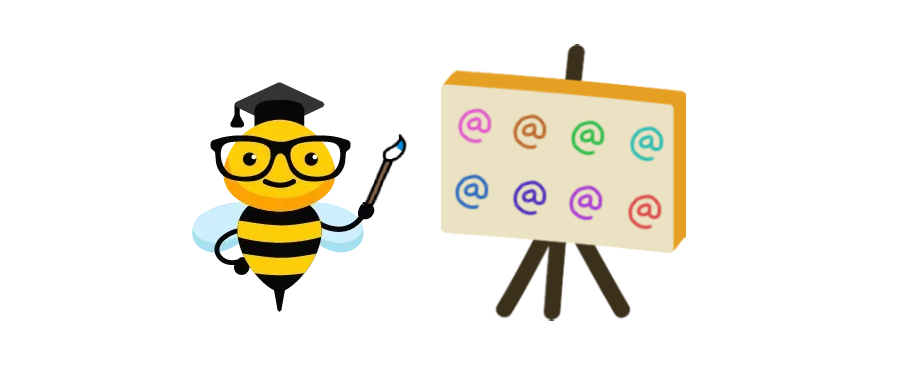

In [11]:
from functions import picture

picture('Новый проект (2) (4).png')

In [ ]:
def null_decorator(func):
    return func


def say():
    print('Привет Мир!')


say = null_decorator(say)  # декорируем функцию

say()

In [ ]:
def null_decorator(func):
    return func


@null_decorator  # декорируем функцию
def say():
    print('Привет Мир!')


say()

In [ ]:
def sample_decorator(func):  # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')

    return wrapper


def say():
    print('Привет Мир!')


say = sample_decorator(say)  # декорируем функцию

say()  # вызываем декорированную функцию

In [ ]:
def sample_decorator(func):  # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')

    return wrapper


@sample_decorator  # декорируем функцию
def say():
    print('Привет Мир!')


say()

Просто добавив @sample_decorator перед определением функции say(), мы модифицировали её поведение. Однако, как вы уже могли догадаться, запись с @ является всего лишь синтаксическим сахаром для записи:

In [ ]:
say = sample_decorator(say)

Иными словами, выражение @sample_decorator вызывает функцию sample_decorator() с say в качестве аргумента и присваивает имени say возвращаемую функцию.

Обратите внимание, что использование синтаксиса @ декорирует функцию сразу во время определения. Это затрудняет доступ к недекорированной функции. Поэтому мы можем декорировать некоторые функции вручную, чтобы сохранить возможность вызывать и недекорированную версию функции.

Изменение поведения функции

Декоратор может менять поведение декорируемой функции. Напишем декоратор, который преобразует строковый результат декорированной функции в верхний регистр.

In [13]:
def uppercase_decorator(func):
    def wrapper():
        original_result = func()
        modified_result = original_result.upper()
        return modified_result

    return wrapper

Вместо того чтобы просто возвращать исходную функцию, как это делал null_decorator(), декоратор uppercase_decorator() определяет и возвращает новую функцию wrapper(). Функция wrapper(), являясь замыканием, имеет доступ к недекорированной функции func и может выполнять дополнительный код до и после вызова функции func

In [14]:
@uppercase_decorator
def greet():
    return 'Hello world!'


print(greet())

HELLO WORLD!


В отличие от null_decorator(), наш новый декоратор uppercase_decorator() возвращает другой объект функции, в чем несложно убедиться.

In [15]:
def greet():
    return 'Hello world!'


print(greet)
greet = uppercase_decorator(greet)  # ручное декорирование
print(greet)

<function greet at 0x000002DB09217C40>
<function uppercase_decorator.<locals>.wrapper at 0x000002DB092177E0>


Декоратор uppercase_decorator() сам по себе является функцией. Единственный способ повлиять на новое поведение функции, которую он декорирует, — это заменить исходную функцию замыканием. Вот почему декоратор uppercase_decorator() определяет и возвращает другую функцию wrapper(), которую затем можно вызвать позже, запустить исходную функцию и изменить ее результат.

Применение нескольких декораторов

Мы можем без каких-либо проблем применять к функции несколько различных декораторов. Это накапливает их эффекты, и делает декораторы очень полезными на практике.

Рассмотрим два декоратора bold() и italic(), которые заключают результат вызова функции в HTML-теги:

In [16]:
def bold(func):
    def wrapper():
        return '<b>' + func() + '</b>'

    return wrapper


def italic(func):
    def wrapper():
        return '<i>' + func() + '</i>'

    return wrapper

Применим их к функции greet().

In [17]:
@bold
@italic
def greet():
    return 'Hello world!'


print(greet())

<b><i>Hello world!</i></b>


Декораторы применяются в порядке снизу вверх. Таким образом, мы можем явно использовать декорирование, обойдясь без специального синтаксиса. В таком случае цепочка вызовов функций декораторов будет выглядеть так:

In [18]:
greet = bold(italic(greet))

Таким образом, сначала применяется декоратор italic(), который оборачивает результат вызова декорируемой функции в теги <i></i>, а затем результирующая обернутая функция снова обертывается декоратором bold(), который оборачивает результат вызова декорируемой функции в теги <b></b>.

Глубокие уровни наложения декораторов в итоге могут повлиять на производительность, поскольку они продолжают добавлять вложенные вызовы функций. Обычно на практике это не создает проблем, но об этом следует помнить, если вы работаете с кодом, требующим высокой производительности.

Декорирование функций, принимающих аргументы

Изменим функцию greet() так, чтобы она принимала аргумент name:

In [19]:
def greet(name):
    return f'Hello {name}!'

In [20]:
print(greet('Timur'))

Hello Timur!


Попробуем применить наш декоратор bold() к новой функции greet().

In [21]:
@bold
def greet(name):
    return f'Hello {name}!'


print(greet('Timur'))

TypeError: bold.<locals>.wrapper() takes 0 positional arguments but 1 was given

Проблема в том, что внутренняя функция wrapper() не принимает никаких аргументов, а мы пытались ей передать один аргумент Timur. Эту проблему можно исправить, позволив wrapper() принять один аргумент, но тогда она не будет работать для функций, которые не принимают аргументов или принимают больше одного аргумента.

Решение заключается в использовании *args и **kwargs во внутренней функции, что позволит ей принимать произвольное число позиционных и именованных аргументов:

In [22]:
def bold(func):
    def wrapper(*args, **kwargs):
        return '<b>' + func(*args, **kwargs) + '</b>'

    return wrapper

In [23]:
@bold
def greet1(name):
    return f'Hello {name}!'


@bold
def greet2():
    return 'Hello world!'


@bold
def greet3(name, surname):
    return f'Hello {name} {surname}!'


print(greet1('Timur'))
print(greet2())
print(greet3('Timur', 'Guev'))

<b>Hello Timur!</b>
<b>Hello world!</b>
<b>Hello Timur Guev!</b>


В примере выше вложенная функция wrapper() принимает произвольное число позиционных и именованных аргументов и передает их в декорируемую функцию func(). Теперь декоратор @bold будет работать как для функций, которые вообще не принимают аргументы, так и для функций которые принимают произвольное количество позиционных и именованных аргументов.

Возврат значений из декорируемой функции

В Python все функции возвращают значение. Даже если тело функции не содержит явно инструкции return, она вернет значение None. Нужно быть очень внимательным к декорированию функций, которые возвращают значения, которые затем используются.

Допустим, мы написали следующий декоратор:

In [24]:
def talk(func):
    def wrapper(*args, **kwargs):
        dash = '-' * 15
        print(dash)
        func(*args, **kwargs)  # вызываем декорируемую функцию
        print(dash)

    return wrapper

И мы хотим декорировать простую функцию, которая возвращает значение:

In [25]:
@talk
def greet(name):
    return f'Hello {name}!'

In [26]:
print(greet('Timur'))

---------------
---------------
None


Декоратор съел возвращаемое значение из функции greet(), так как вложенная функция wrapper() явно не возвращает какого-либо значения, и в итоге вызов декорируемой функции greet('Timur') в примере выше вернул значение None.

Чтобы исправить этот недочет, необходимо сделать так, чтобы вложенная функция wrapper() возвращала задекорированное значение, которое, в свою очередь, возвращает функция. Изменим декоратор talk() следующим образом:

In [27]:
def talk(func):
    def wrapper(*args, **kwargs):
        dash = '-' * 15
        result = func(*args, **kwargs)
        return dash + '\n' + result + '\n' + dash

    return wrapper

In [28]:
@talk
def greet(name):
    return f'Hello {name}!'


print(greet('Timur'))

---------------
Hello Timur!
---------------


Примечания

Примечание 2. Преимущество ручного декорирования (без использования @) в том, что оно позволяет использовать обе версии функции: начальную и декорированную.

Примечание 4. Наглядное представление декоратора:

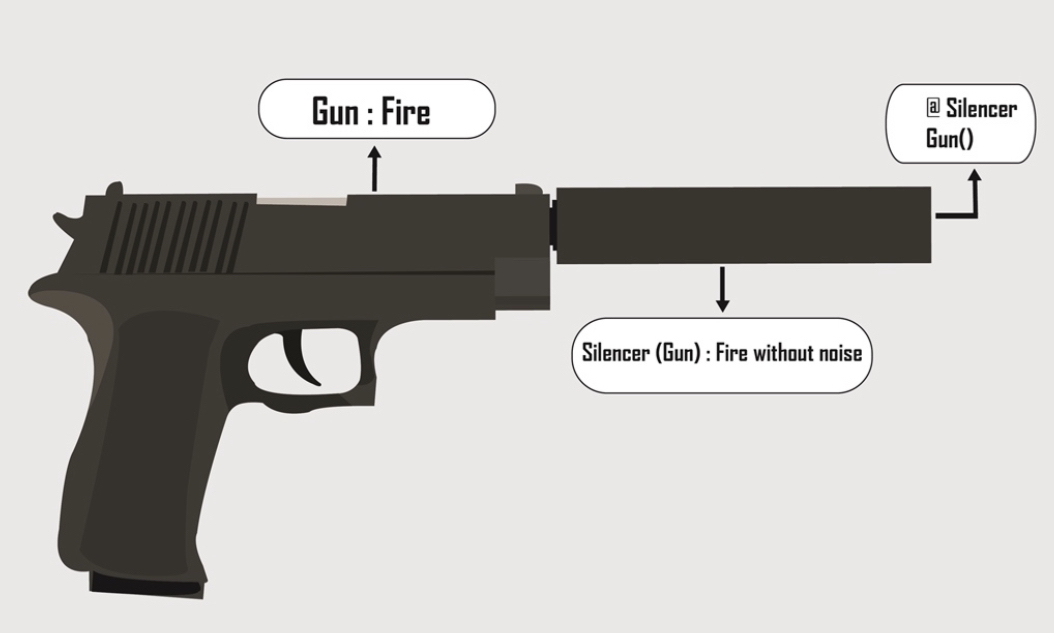

In [29]:
picture('image (2).png')

In [32]:
def make_upper(func):
    def wrapper():
        return func().upper()

    return wrapper


def beegeek():
    return 'beegeek'


new_beegeek = make_upper(beegeek)

print(beegeek())
print(new_beegeek())

beegeek
BEEGEEK


In [33]:
def make_lower(func):
    def wrapper():
        return func().lower()

    return wrapper


def make_capitalize(func):
    def wrapper():
        return func().capitalize()

    return wrapper


def beegeek():
    return 'BEEGEEK'


beegeek = make_lower(make_capitalize(beegeek))

print(beegeek())

beegeek


In [34]:
def double(func):
    def wrapper():
        return func() * 2

    return wrapper


def del_first_char(func):
    def wrapper():
        return func()[1:]

    return wrapper


@double
@del_first_char
def beegeek():
    return 'beegeek'


print(beegeek())

eegeekeegeek


In [35]:
def add_dollar_prefix(func):
    def wrapper():
        result = str(func())
        return '$' + result

    return wrapper


@add_dollar_prefix
def get_price(item):
    prices = {'comic book': 5, 'puzzle': 15}
    return prices[item]


print(get_price('comic book'))

TypeError: add_dollar_prefix.<locals>.wrapper() takes 0 positional arguments but 1 was given

In [38]:
def add_dollar_prefix(func):
    def wrapper(*args, **kwargs):
        result = str(func(*args, **kwargs))
        return '$' + result

    return wrapper


@add_dollar_prefix
def get_price(item, discount=0):
    prices = {'comic book': 5, 'puzzle': 20}
    return prices[item] - discount


print(get_price('puzzle', discount=4))

$16


Декоратор sandwich
Реализуйте декоратор sandwich, который выводит тексты:

---- Верхний ломтик хлеба ----
---- Нижний ломтик хлеба ----
до и после вызова декорируемой функции соответственно.

Примечание 1. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимый декоратор sandwich, но не код, вызывающий его.

In [46]:
def sandwich(func):
    def wrapper(*args, **kwargs):
        print('---- Верхний ломтик хлеба ----')
        result = func(*args, **kwargs)
        print('---- Нижний ломтик хлеба ----')
        return result

    return wrapper


@sandwich
def add_ingredients(ingredients):
    print(' | '.join(ingredients))


add_ingredients(['томат', 'салат', 'сыр', 'бекон'])


@sandwich
def beegeek():
    return 'beegeek'


print(beegeek())

---- Верхний ломтик хлеба ----
томат | салат | сыр | бекон
---- Нижний ломтик хлеба ----
---- Верхний ломтик хлеба ----
---- Нижний ломтик хлеба ----
beegeek


Новый print

Напишите программу с использованием декоратора, которая переопределяет функцию print() так, чтобы она печатала весь текст в верхнем регистре.

Формат входных данных
На вход программе ничего не подается.

Формат выходных данных
Программа должна задекорировать функцию print() так, чтобы она печатала весь текст в верхнем регистре.

Примечание 1. Значения sep и end также должны переводиться в верхний регистр.

Примечание 2. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

In [ ]:
# wrapper возвращает None, но в процессе при присвоении result = func(*args, **kwargs) вызывает print, который печатает строку
def new_print(func):
    def wrapper(*args, **kwargs):
        new_args = (i.upper() if isinstance(i, str) else i for i in args)
        new_kwargs = {k: v.upper() if isinstance(v, str) else v for k, v in kwargs.items()}
        result = func(*new_args, **new_kwargs)
        return result

    return wrapper


print = new_print(print)

print('hi', 'there', end='!')

Декоратор do_twice
Реализуйте декоратор do_twice, вызывающий декорируемую функцию два раза.

Примечание 1. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимый декоратор do_twice, но не код, вызывающий его. 

In [60]:
def do_twice(func):
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        # func(*args, **kwargs)
        return func(*args, **kwargs)

    return wrapper


# @do_twice
# def beegeek():
#     print('beegeek')
# 
# beegeek()

# @do_twice
# def beegeek():
#     print('beegeek')
# 
# print(beegeek())

@do_twice
def beegeek(a, b, sep):
    print(a + b + sep)


beegeek(1, 2, sep=10)

13
13


Декоратор reverse_args
Реализуйте декоратор reverse_args, который передает все позиционные аргументы в декорируемую функцию func в обратном порядке.

Примечание 1. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимый декоратор reverse_args, но не код, вызывающий его

In [64]:
def reverse_args(func):
    def wrapper(*args, **kwargs):
        args = args[::-1]
        return func(*args, **kwargs)

    return wrapper


@reverse_args
def power(a, n):
    return a ** n


print(power(2, 3))

9


Декоратор exception_decorator
Реализуйте декоратор exception_decorator, который возвращает

кортеж (value, 'Функция выполнилась без ошибок'), если декорируемая функция завершила свою работу без ошибок, где value — возвращаемое значение декорируемой функции
кортеж (None, 'При вызове функции произошла ошибка'), если при выполнении декорируемой функции возникла ошибка
Примечание 1. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимый декоратор exception_decorator, но не код, вызывающий его. 

In [1]:
def exception_decorator(func):
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs), 'Функция выполнилась без ошибок'
        except TypeError:
            return (None, 'При вызове функции произошла ошибка')

    return wrapper


@exception_decorator
def f(x):
    return x ** 2 + 2 * x + 1


print(f(7))

sum = exception_decorator(sum)

print(sum(['199', '1', 187]))

(64, 'Функция выполнилась без ошибок')
(None, 'При вызове функции произошла ошибка')


Декоратор takes_positive
Реализуйте декоратор takes_positive, который проверяет, что все аргументы, передаваемые в декорируемую функцию, являются положительными целыми числами.

Если хотя бы один аргумент не удовлетворяет данному условию, декоратор должен возбуждать исключение:

TypeError, если аргумент не является целым числом
ValueError, если аргумент является целым числом, но отрицательным или равным нулю
Примечание 1. Приоритет возбуждения исключений при несоответствии аргумента обоим условиям или при наличии разных аргументов, несоответствующих разным условиям: TypeError, затем ValueError.

Примечание 2. Не забывайте про то, что декоратор не должен поглощать возвращаемое значение декорируемой функции, а также должен уметь декорировать функции с произвольным количеством позиционных и именованных аргументов.

Примечание 3. В тестирующую систему сдайте программу, содержащую только необходимый декоратор takes_positive, но не код, вызывающий его.

In [4]:
def takes_positive(func):
    def wrapper(*args, **kwargs):
        if not all(isinstance(i, int) for i in args):
            raise TypeError
        if not all(isinstance(i, int) for i in kwargs.values()):
            raise TypeError
        elif any(i <= 0 for i in args) or any(i <= 0 for i in kwargs.values()):
            raise ValueError
        else:
            return func(*args, **kwargs)

    return wrapper


# @takes_positive
# def positive_sum(*args):
#     return sum(args)
# 
# 
# print(positive_sum(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# 
# @takes_positive
# def positive_sum(*args):
#     return sum(args)
#     
# try:
#     print(positive_sum(-3, -2, -1, 0, 1, 2, 3))
# except Exception as err:
#     print(type(err))
#     
# @takes_positive
# def positive_sum(*args):
#     return sum(args)
#     
# try:
#     print(positive_sum('10', 20, 10))
# except Exception as err:
#     print(type(err))
    
# @takes_positive
# def positive_sum(*args, **kwargs):
#     return sum(args) + sum(kwargs.values())
#     
# try:
#     print(positive_sum(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, par1=1, sep=-40))
# except Exception as err:
#     print(type(err))

@takes_positive
def positive_sum(*args, **kwargs):
    return sum(args) + sum(kwargs.values())
    
print(positive_sum(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, par1=1, sep=4))

60


In [ ]:
def takes_positive(func):
    def wrapper(*args, **kwargs):
        for i in [*args, *kwargs.values()]:
            if not type(i) is int:
                raise TypeError
            elif i <= 0:
                raise ValueError
        return func(*args, **kwargs)
    return wrapper